In [1]:
import torch
import datasets, networks, sampling, completion, evaluation
import matplotlib.pyplot as plt
from torch import nn

In [2]:
num_residual = 15
num_kernels = 128
PixelCNN = networks.PixelCNN(num_kernels=num_kernels, num_residual=num_residual)

stae_dict = torch.load("PixelCNN_cifar10.pth")
PixelCNN.load_state_dict(stae_dict)

<All keys matched successfully>

In [3]:
ds = datasets.Dataset('cifar10', batch_size=16)
training_data = ds.get_train_data_loader()
test_data = ds.get_test_data_loader()

Files already downloaded and verified


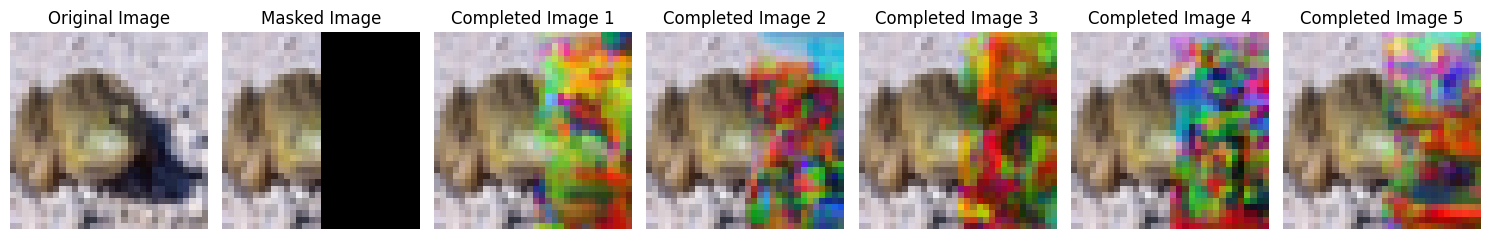

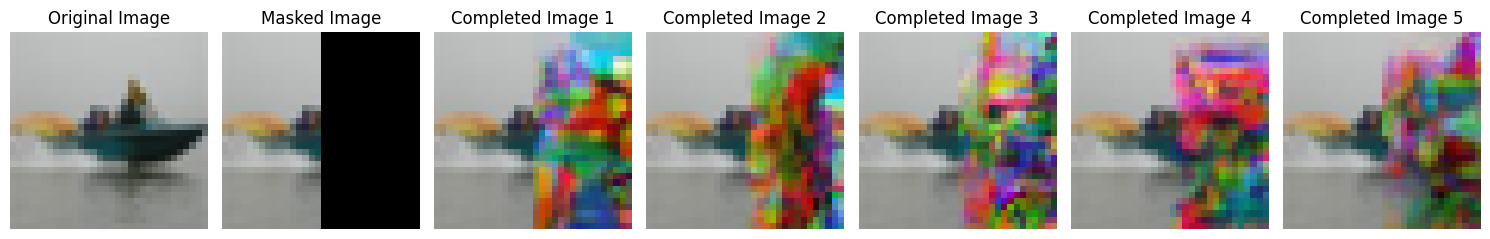

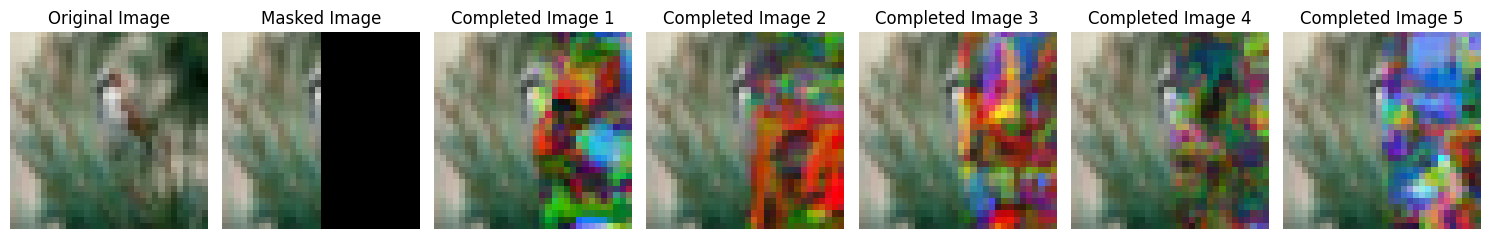

In [4]:
for i in range(3):
    original_img = completion.get_random_cifar10_image(ds)
    masked_img, mask = completion.mask_image_right_half(original_img)
    completed_img = completion.complete(PixelCNN, masked_img, mask)
    completion.plot_completed_images(original_img, masked_img, completed_img)

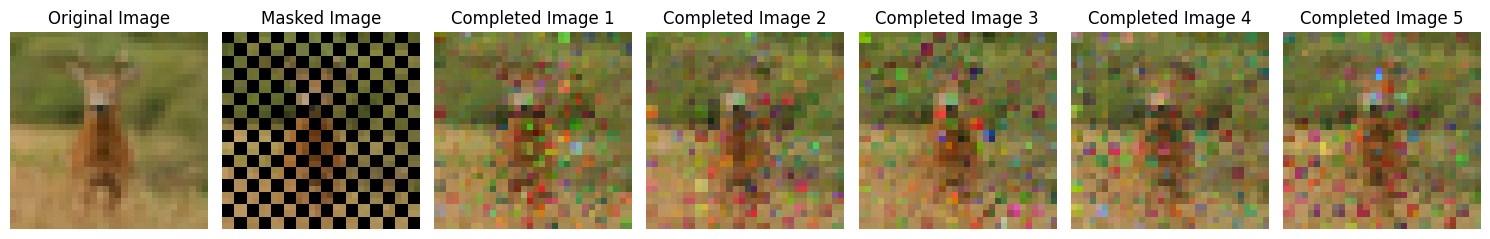

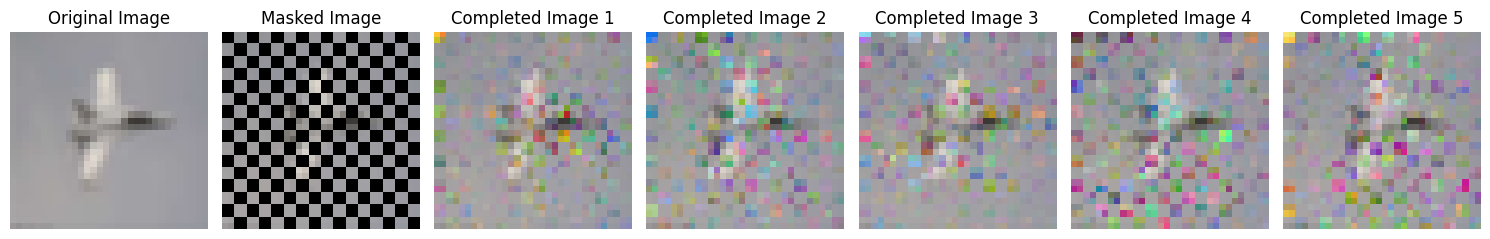

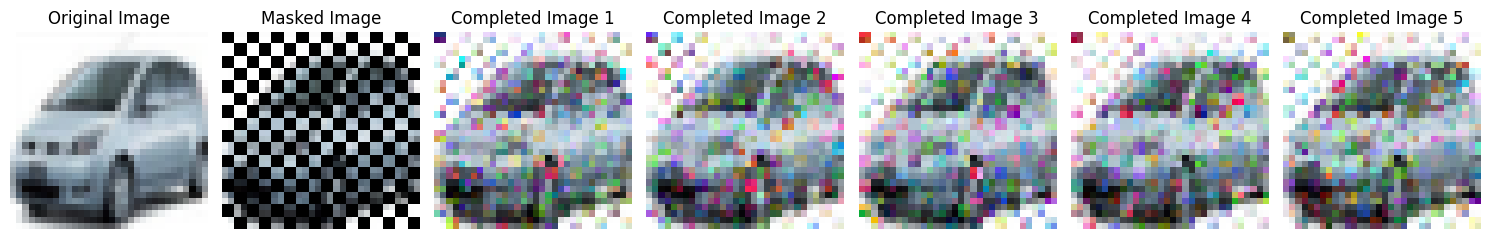

In [5]:
for i in range(3):
    original_img = completion.get_random_cifar10_image(ds)
    masked_img, mask = completion.mask_image_chessboard(original_img, field_size=2)
    completed_img = completion.complete(PixelCNN, masked_img, mask)
    completion.plot_completed_images(original_img, masked_img, completed_img)